##**Defining the Question.**
Nairobi hospital requires us to build a model to check if a patient tests positive or negative for hypothyroid

##**a) Specifying the Question**

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

##**b) Defining the Metric for Success**

Load and Analyze data. Normalize data as it has different units. Create random forest classifier model to depict accuracy.Challenge the model with other models and check accuracy change.

##**c) Understanding the context**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**Part 1: Decision trees:**
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

**Part 2: SVM:**

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

##**d) Recording the Experimental Design**

(CRISP- DM) methodology

Get the data

understand the data

Clean the data

Explore the data

Create models

Challenge model

Evaluate model perfomance

##1. **Data Relevance**

###1.1 **Loading Libraries**

In [0]:
#Import pandas libraries
import pandas as pd

#Import numpy libraries
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Import category encoders
import category_encoders as ce


#Import sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn import metrics
#  import classifier libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler


# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

#Import warnings filter libraries
import warnings
warnings.filterwarnings('ignore')

### 1.2 **Load Dataset**

In [2]:
#Load the dataset
df = pd.read_csv('hypothyroid.csv')

# Check shape of the dataset
df.shape

(3163, 26)



*   Our dataset has 26 columns and 3163 rows.




In [0]:
#Check the first five rows of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


###**1.3 Data Cleaning**

In [0]:
#Check null values

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

Our dataset has no null values. However if we check on certain  columns there is a ? which should be converted to NAN value

### **1.4 Replace ? with NAN**

In [0]:
#Count unique elements in each column including NaN
uniqueValues = df.nunique(dropna=False)
uniqueValues


Count Unique values in each column including NaN
status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64




*   Column sex has 3 unique values, to check we print the unique values.



In [3]:
#For example the below column has a unique value ? which needs to be replaced  
df['sex'].unique()

array(['M', 'F', '?'], dtype=object)

In [4]:
#Replace all rows with ? to nan
df.replace('?',np.nan,inplace=True)
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [5]:
#Check for missing values
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
#Confirm that the ? value has been replaced.
df['sex'].unique()


array(['M', 'F', nan], dtype=object)

In [6]:
#Checking data types of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          2717 non-null object
sex                          3090 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          2695 non-null object
T3_measured                  3163 non-null object
T3                           2468 non-null 



*   There are numerical variables that need to be converted to numeric type.


In [7]:
num = ['age','TSH','T3','TT4','T4U','FTI']
num

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [0]:
categorical= ['status','sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured','T3_measured','TT4_measured',
      'T4U_measured','FTI_measured','TBG_measured', 'TBG']

In [9]:
#convert  object to numerical columns

df[num] = df[num].apply(pd.to_numeric)
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

In [10]:
# To confirm they have been converted,split numerical variables from categorical variables
numerical_variables = [col for col in df.columns if df[col].dtypes != 'O']
numerical_variables


['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [11]:
#Get all categorical variables
categorical_variables = [col for col in df.columns if df[col].dtypes == 'O']
categorical_variables

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured',
 'TBG']

In [12]:
#Check again for missing values
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
#Fill missing values of numerical variables
# Use simple imputer to fill missing values with the mean

impute = SimpleImputer(strategy ='mean')
df[numerical_variables] = impute.fit_transform(df[numerical_variables])

In [16]:
# Fill missing values for categorical data
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['TBG'].fillna(df['TBG'].mode()[0], inplace=True) 

#Confirm there are no missing values
df.isnull().sum()   

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

##**2. EDA(Exploratory Data Analysis)**

###**2.1 Checking for anomalies**

In [17]:
# Check for sum of duplicated rows
df.duplicated().sum()

77

There are 77 duplicated rows. we drop this to avoid inconsistencies and complimicing accuracy of the model.

In [18]:
#Drop the duplicate rows.
df.drop_duplicates(keep=False,inplace=True)

#Confirm the duplicated rows have been deleted.
df.duplicated().sum()

0

##**2.2 Understanding the data**

For this part, I wanted to understand the qualities that would make a patient at Nairobi Hospital test negative for hypotyroid or positive for it.

In [24]:
# Since majority status are negative, We will filter the max qualities of a patient and understand better their qualities

df.max()

status                          1
age                            98
sex                             M
on_thyroxine                    t
query_on_thyroxine              t
on_antithyroid_medication       t
thyroid_surgery                 t
query_hypothyroid               t
query_hyperthyroid              t
pregnant                        t
sick                            t
tumor                           t
lithium                         t
goitre                          t
TSH_measured                    y
TSH                           530
T3_measured                     y
T3                           10.2
TT4_measured                    y
TT4                           450
T4U_measured                    y
T4U                          2.21
FTI_measured                    y
FTI                           881
TBG_measured                    y
TBG                          9.30
dtype: object



*   The patient is negative for hypthyroid

*   Highest recorded age was 98 years and is male
*   The patient is not sick nor pregnant nor has goitre.
* FTI is 980, TBG 9.30



In [25]:
# Since minority status have hypothyroid, We will filter the min qualities of a patient and understand better their qualities

df.min()

status                         0
age                            1
sex                            F
on_thyroxine                   f
query_on_thyroxine             f
on_antithyroid_medication      f
thyroid_surgery                f
query_hypothyroid              f
query_hyperthyroid             f
pregnant                       f
sick                           f
tumor                          f
lithium                        f
goitre                         f
TSH_measured                   n
TSH                            0
T3_measured                    n
T3                             0
TT4_measured                   n
TT4                            2
T4U_measured                   n
T4U                          0.2
FTI_measured                   n
FTI                            0
TBG_measured                   n
TBG                            0
dtype: object



*   Lowest age recorded was one year and is female.
*  FTI is 0 and TBG is 0

*   However being pregnant at that age does not make sense.This can be an input done after filling nan with mode or was an input error at the facility.


*   Better evaluation will be done by the models.








In [20]:
#We define x and y
y = df['status']
y


0       hypothyroid
1       hypothyroid
2       hypothyroid
3       hypothyroid
4       hypothyroid
           ...     
3158       negative
3159       negative
3160       negative
3161       negative
3162       negative
Name: status, Length: 3010, dtype: object

In [21]:
#Change our target values(y) to a binary

y =df['status']= np.where(df['status']=='hypothyroid',0,1)
print(y)
df['status'].value_counts()


[0 0 0 ... 1 1 1]


1    2879
0     131
Name: status, dtype: int64



*   1 means it's negative
*   0 means it's hypothyroid



In [22]:
X = df.drop(['status'], axis=1)
X

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,28
1,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,28
2,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,28
3,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,28
4,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,28
3159,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,28
3160,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,28
3161,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,28


###**2.3 Univariate Analysis**

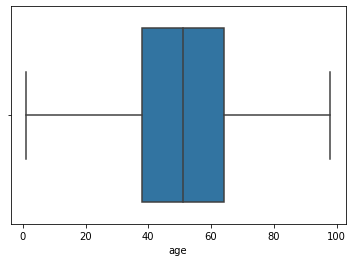

In [27]:

#Use boxplots for status column which would be our target variable.

sns.boxplot(x=df['age'])



*   There are no outliers for age



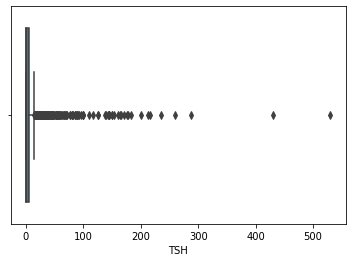

In [29]:
#Boxplot to show distribution of patients with thyroid disorder
sns.boxplot(x=df['TSH'])

The boxplot shows there are outliers.This however can be so because majority who are negative for hypothyroid show very high TSH.

In [33]:
#We can view the characteristics of the data point that is far away from other datapoints.
#View the row that has the outlier 
z= df[df["TSH"] >= 500]
z

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
31,0,59.0,F,f,f,f,f,f,f,f,f,f,f,f,y,530.0,y,2.0,y,10.0,y,1.12,y,8.5,n,28


The outlier is a female 59 years of age.Due to her age posibility of having thyroid gland disorder is high. This information is relevantly true.

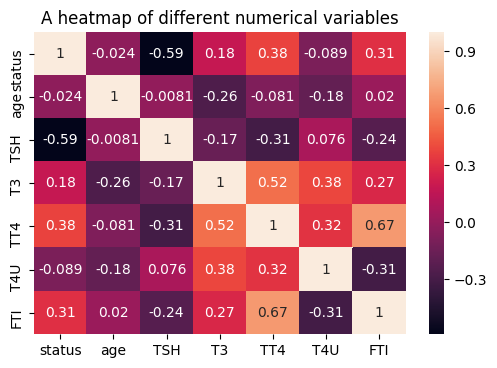

In [30]:
#  checking for correlation of numerical variables

plt.figure(dpi=100)

sns.heatmap(df.corr(),annot=True)
plt.title('A heatmap of different numerical variables')

plt.show()

The lighter the shade shows that the relationship between the variables is a strong positive correlation.

###**2.4 Bivariate Analysis**

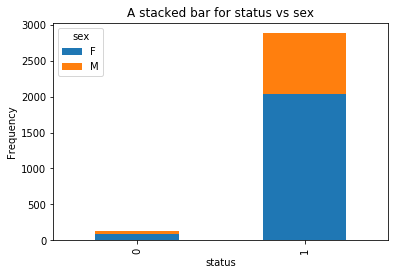

In [36]:
df.groupby(['status','sex']).size().unstack().plot(kind='bar',stacked=True)
plt.title('A stacked bar for status vs sex')
plt.ylabel('Frequency')
plt.show()



*   Most patients tested negative for hypothyroid
*   Most patients who tested negative for hypothyroid are female.

*   Most patients that visit Nairobi hospital are female






##**3. Data Preprocessing**

In [34]:
from sklearn.model_selection import train_test_split

#Split our dataset train dataset size is 80% test datset is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape)

(2408, 25) (602, 25)


In [32]:
!pip install sklearn

In [31]:
!pip install category_encoders

     |████████████████████████████████| 102kB 1.2MB/s 


In [0]:

# encode categorical variables with one-hot encoding to numeric

encoder = ce.OneHotEncoder(cols=['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)



In [39]:
print(X_train.head(4))

            age  sex_1  sex_2  on_thyroxine_1  ...  TBG_43  TBG_44  TBG_45  TBG_46
3084  51.154214      1      0               1  ...       0       0       0       0
155   64.000000      0      1               1  ...       0       0       0       0
72    29.000000      0      1               1  ...       0       0       0       0
2897  68.000000      0      1               0  ...       0       0       0       0

[4 rows x 88 columns]


In [40]:
#Confirm there is no nan in train dataset.
np.any(np.isnan(X_train))

False

In [41]:
# Confirm there is no nan in  test dataset
np.any(np.isnan(X_test))

False

###**3.1 Feature scaling**

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization.

We need to normalize our independent variables. We use robust scaler to do this.

In [0]:
#Use robust scaler to normalize our dataset
cols = X_train.columns


scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

##**4. Random Forest Classifier model with default parameters- 10 decision trees**

In [45]:

# Intiate the randomforestclassifier 
rf = RandomForestClassifier(random_state=0)

# fit the model
rf.fit(X_train, y_train)

# Predict the Test set results
y_pred = rf.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9884


In [46]:
#Check the error rate of the model.

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.10783277320343841


In [47]:
#Compute the confusion matrix to understand the actual versus predicted variables.
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
confusion


array([[ 18,   5],
       [  2, 577]])




*   **Findings**

*   Model accuracy was 98% with an error rate of 0.11. The model predicted 602 negative and 17 hypothyroid correctly
*   To improve the model perfomance, we increase the number of decision trees to 100, increase the max depth and reduce sample split to 20.



###**4.1 Challenging the model**

##**Random forest classifier using 100 decision trees**

In [49]:
# Run the classifier with n_estimators = 100

rf1 = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=5, min_samples_split = 20)

# fit the model to the training set
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# Predict on the test set results
y_pred1 = rf1.predict(X_test)


In [51]:
# Create a comparison frame between the actual and predicted target variable
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,602.000000,602.000000
mean,0.961794,0.966777
std,0.191853,0.179366
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [54]:
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score with 100 decision-trees : 0.9867


In [55]:
#Check the error rate using root mean squared error

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.10783277320343841


Error rate is very low. 0.11.Shows the model is relevantly good.

In [56]:
# Calculate a confusion matrix to identify what patients were predicted to be negative or have hypothyroid
confusion = confusion_matrix(y_test,y_pred1)
confusion

array([[ 15,   8],
       [  0, 579]])





* **Findings**


*   The model accuracy still remained the same 98% even after the number of decision trees.The error rate is very minimal : 0.11

*   The model predicted 579 patients were negative while in the actual they wrere negative.
*   The model predicted 15 patients had hypotyroid while in the actual they were.


*   This means the accuracy of the model is not affected by the change in decision trees.

*   However, we can still improve on the model using gradient boosting and see how it will perfom.






##**Gradient Boosting Classifier**

In [60]:
#Intiate the gradient boosting classifier
gradient = GradientBoostingClassifier(learning_rate =0.1,n_estimators=100,max_depth=3,min_samples_split=2) # defining my classifier as  gradient

#fit the train dataset in the classifier
gradient.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [61]:
#Making a prediction
y_pred_g = gradient.predict(X_test)
y_pred_g

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [62]:
#Check the accuracy score of the gradient model
print("gradient_Accuracy score is :",metrics.accuracy_score(y_test, y_pred_g))

gradient_Accuracy score is : 0.9900332225913622


In [63]:
# Calculate a confusion matrix to identify what patients were predicted to be negative or have hypothyroid
confusion = confusion_matrix(y_test,y_pred_g)
confusion

array([[ 19,   4],
       [  2, 577]])



*   **Findings**
*   The accuracy score of the model increased to 99%.

*   The model predicted 577 patients were negative while in the actual they wrere negative.
*   The model predicted 19 patients had hypothyroid while in the actual they were.
*   In this case, we can use the gradient boosting classifier model compared to random forest as it's perfomance increased.





##**SVM(Support Vector Machine)**

SVM is based on the idea of finding a hyperplane that best separates the features into different domains.

To challenge our baseline model, we will use svm and tuning with:


RBF - Radial basis function kernel

Polynomial kernel

Linear kernel

In [0]:
#For this, we will create svm before parameter tuning and after parameter tuning using rbf. This is because we are solving a classifier.
# SVM before parameter tuning
svm  = SVC(kernel = 'linear',C=1.0,gamma='auto',random_state=2)

#SVM after parameter tuning. RBf is used to increase the dimension
svm_rbf = SVC(kernel = 'rbf',C=1.0,gamma='auto',random_state=0)

#SVM after parameter tuning. Sigmoid is used to increase the dimension
clf = SVC(kernel = 'sigmoid',C=1.0,gamma='auto',random_state=0)


In [65]:
#  fitting the train into the model

#For linear
svm.fit(X_train,y_train)

#For rbf
svm_rbf.fit(X_train,y_train)

#For sigmoid
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
# Now that we have trained our model, let's test how well it can predict if a patient is negattive or positive for hypothyroid

#Making predictions for linear
y_pred_svc = svm.predict(X_test)

#Making predictions for rbf
y_pred_rbf = svm_rbf.predict(X_test)

#Making predictions with parameter tuning
y_pred1 = clf.predict(X_test)

In [68]:
#Check accuracy of model before setting any parameters
print("Accuracy with linear kernel:",metrics.accuracy_score(y_test, y_pred_svc))

#Accuracy score using rbf function
print("Accuracy with rbf kernel : ", accuracy_score(y_test,y_pred_rbf))

#Accuracy score using sigmoid function
print("Accuracy with sigmoid kernel : ", accuracy_score(y_test,y_pred))

Accuracy with linear kernel: 0.9867109634551495
Accuracy with rbf kernel :  0.9916943521594684
Accuracy with sigmoid kernel :  0.9883720930232558





*   **Findings**


*    Reason behind not plotting the graph to show the hyperplane  is that we were dealing with multiple features so it would have been pretty hard to visualize.

*   The accuracy score of models was 98.6% after tuning the parameters using linear, the model accuracy increased to 99%. Sigmoid is 98.8%






##**Further questions**


*   Based on the fact that our dataset had many patients with negative results on hypothyroid,did it affect the model accuracy to be that high even after using advanced models?






##**Challenges**


*   Despite using different classification models, differences between the model accuracy was very minimal.


*   It was a challenge picking the best model for prediction since they all had almost the same accuracy score and very low error rate.






##**Future prospects**


*   Dataset should be evenly distributed interms of status to avoid model overfitting.

